 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [297]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [298]:
# Reading whale returns
fp_1 = Path(r"C:\Users\Micha\Documents\Module 4 Hwk\Starter_Code\Resources\whale_returns.csv")
wr_data = pd.read_csv(fp_1, index_col='Date',infer_datetime_format=True, parse_dates=True)
wr_data

C:\Users\Micha\AppData\Local\Temp\ipykernel_11616\3555934843.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  wr_data = pd.read_csv(fp_1, index_col='Date',infer_datetime_format=True, parse_dates=True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [299]:
# Count nulls
wr_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [300]:
# Drop nulls
wr_data = wr_data.dropna()
wr_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [301]:
# Reading algorithmic returns
fp_2 = Path(r"C:\Users\Micha\Documents\Module 4 Hwk\Starter_Code\Resources\algo_returns.csv")
alg_data = pd.read_csv(fp_2, index_col='Date',infer_datetime_format=True, parse_dates=True)
alg_data

C:\Users\Micha\AppData\Local\Temp\ipykernel_11616\2199522087.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  alg_data = pd.read_csv(fp_2, index_col='Date',infer_datetime_format=True, parse_dates=True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [302]:
# Count nulls
alg_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [303]:
# Drop nulls
alg_data = alg_data.dropna()
alg_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [304]:
# Reading S&P 500 Closing Prices
fp_3 = Path(r"C:\Users\Micha\Documents\Module 4 Hwk\Starter_Code\Resources\sp500_history.csv")
# sp500_data = pd.read_csv(fp_3, index_col='Date',infer_datetime_format=True, parse_dates=True)
date_format = '%d-%b-%y'
sp500_data = pd.read_csv(fp_3, index_col='Date', parse_dates=True, date_parser=lambda x: pd.to_datetime(x, format=date_format))
sp500_data

C:\Users\Micha\AppData\Local\Temp\ipykernel_11616\1953935962.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  sp500_data = pd.read_csv(fp_3, index_col='Date', parse_dates=True, date_parser=lambda x: pd.to_datetime(x, format=date_format))


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [305]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [306]:
sp500_data = sp500_data.sort_index(axis=0, ascending=True)

In [307]:
# Fix Data Types
# df['Price'] = df['Price'].str.replace('[\$,]', '', regex=True).astype(float)
sp500_data['Close'] = sp500_data['Close'].str.replace('[\$,]','', regex=True).astype(float)

sp500_data

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [308]:
# Calculate Daily Returns
sp500_data['Daily Returns'] = sp500_data['Close'].pct_change()
sp500_data

,Close,Daily Returns
Date,,
2012-10-01,1444.49,NaN
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
...,...,...
2019-04-16,2907.06,0.000509
2019-04-17,2900.45,-0.002274
2019-04-18,2905.03,0.001579


In [309]:
# Drop nulls
sp500_data = sp500_data.dropna()
sp500_data.isnull().sum()

Close            0
Daily Returns    0
dtype: int64

In [310]:
# Rename `Close` Column to be specific to this portfolio.
sp500_data.rename(columns={'Close':'Closing Price SP500'}, inplace=True)
sp500_data

C:\Users\Micha\AppData\Local\Temp\ipykernel_11616\1050014976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_data.rename(columns={'Close':'Closing Price SP500'}, inplace=True)


,Closing Price SP500,Daily Returns
Date,,
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
2012-10-08,1455.88,-0.003457
...,...,...
2019-04-16,2907.06,0.000509
2019-04-17,2900.45,-0.002274
2019-04-18,2905.03,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [311]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combinded_df = pd.concat([wr_data, alg_data, sp500_data], axis=1)
combinded_df = combinded_df.drop('Closing Price SP500',axis=1)
combinded_df = combinded_df.dropna()
combinded_df.head(700)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2017-12-01,0.005809,0.001531,-0.001728,-0.003915,0.003577,-0.002001,-0.002024
2017-12-04,-0.006967,-0.004668,0.007474,-0.012990,-0.013438,0.002550,-0.001052
2017-12-05,-0.005089,-0.004081,-0.011800,0.001915,0.001745,-0.005638,-0.003739


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

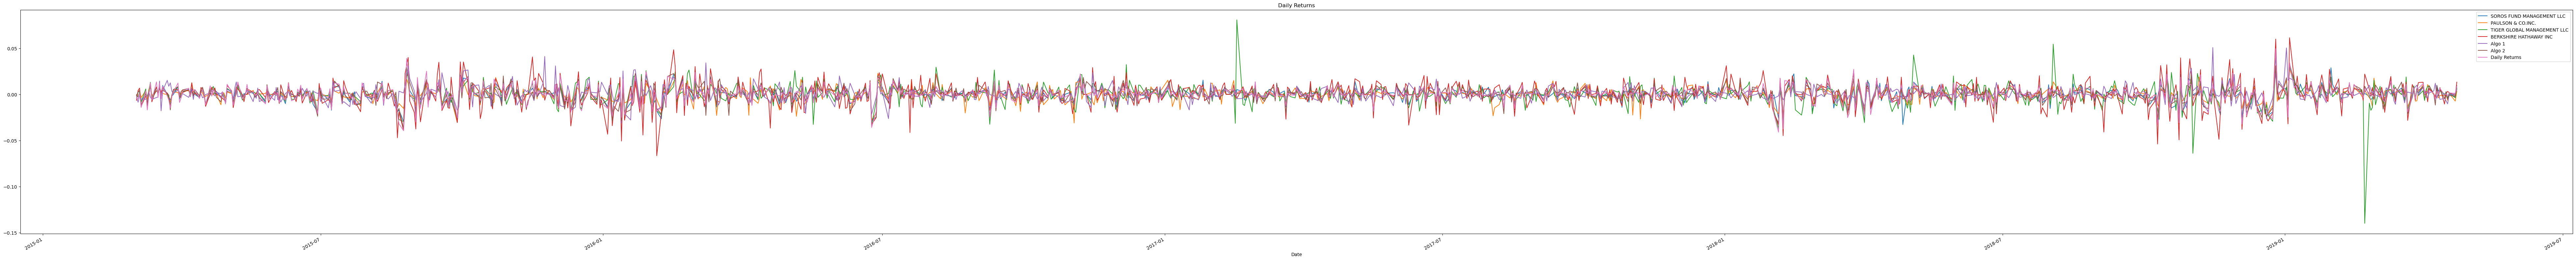

In [312]:
# Plot daily returns of all portfolios
combinded_df.plot(figsize=(100,10), title='Daily Returns')

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

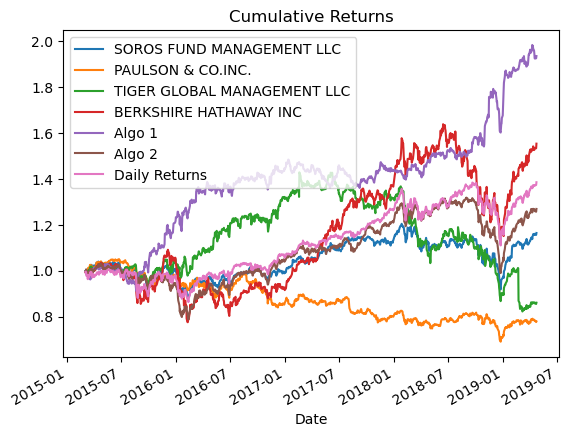

In [313]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combinded_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Portfolio Returns Box Plot'}>

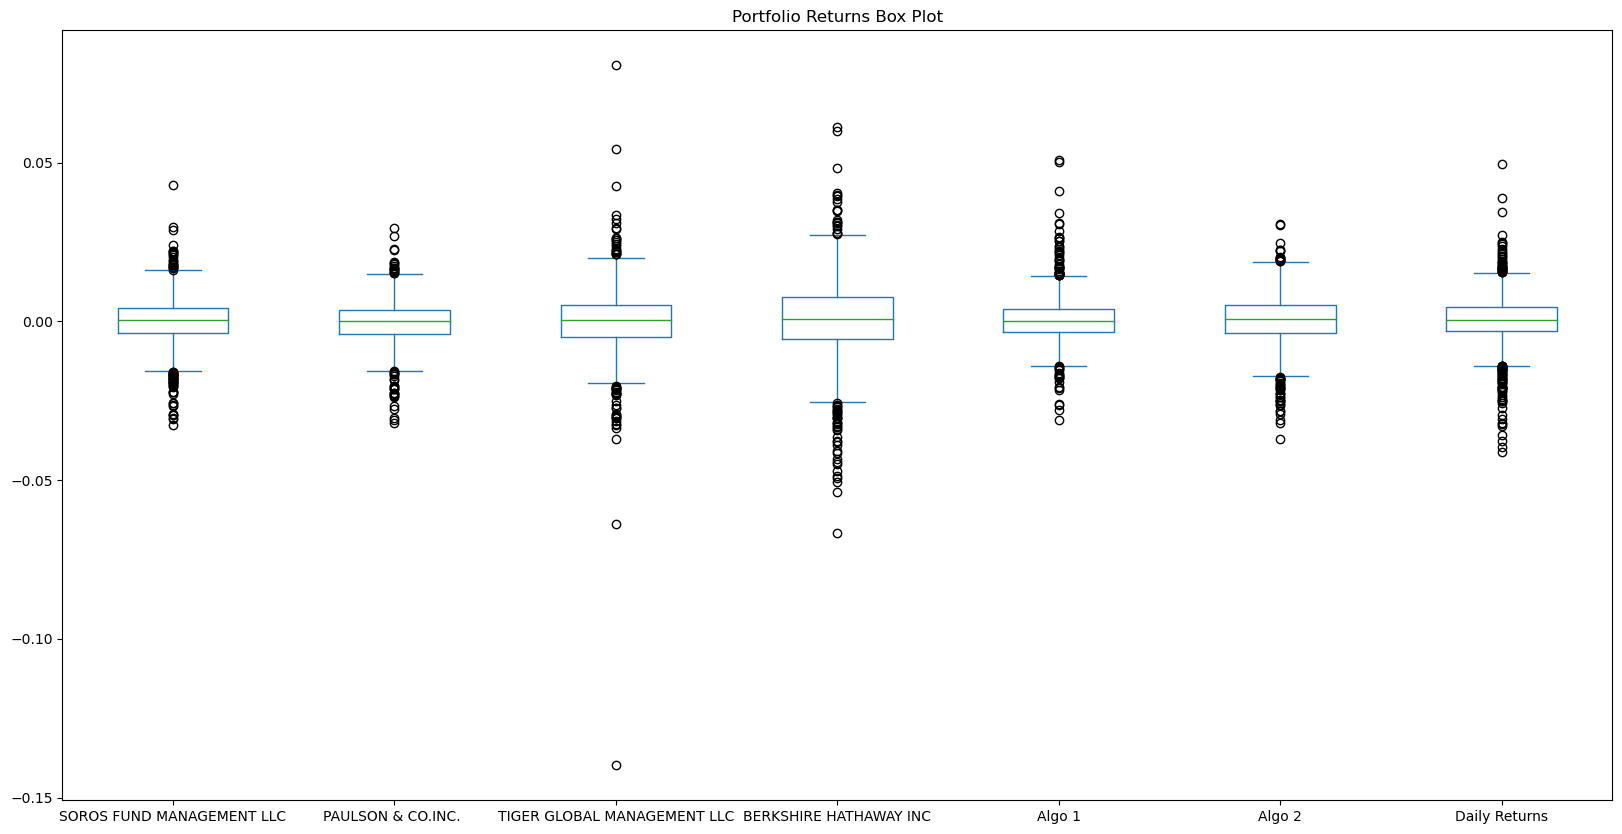

In [314]:
# Box plot to visually show risk
combinded_df.plot(kind="box", title="Portfolio Returns Box Plot", figsize=(20,10))

### Calculate Standard Deviations

In [315]:
# Calculate the daily standard deviations of all portfolios
df_std = combinded_df.std()
df_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
Daily Returns                  0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [316]:
# Calculate  the daily standard deviation of S&P 500
display(combinded_df['Daily Returns'].std())

# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = df_std[df_std > df_std["Daily Returns"]]
riskier_portfolios

0.008553731597758204

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [317]:
# Calculate the annualized standard deviation (252 trading days)
trading_days_per_year = 252
df_annualized_std = df_std * np.sqrt(trading_days_per_year)
df_annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
Daily Returns                  0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

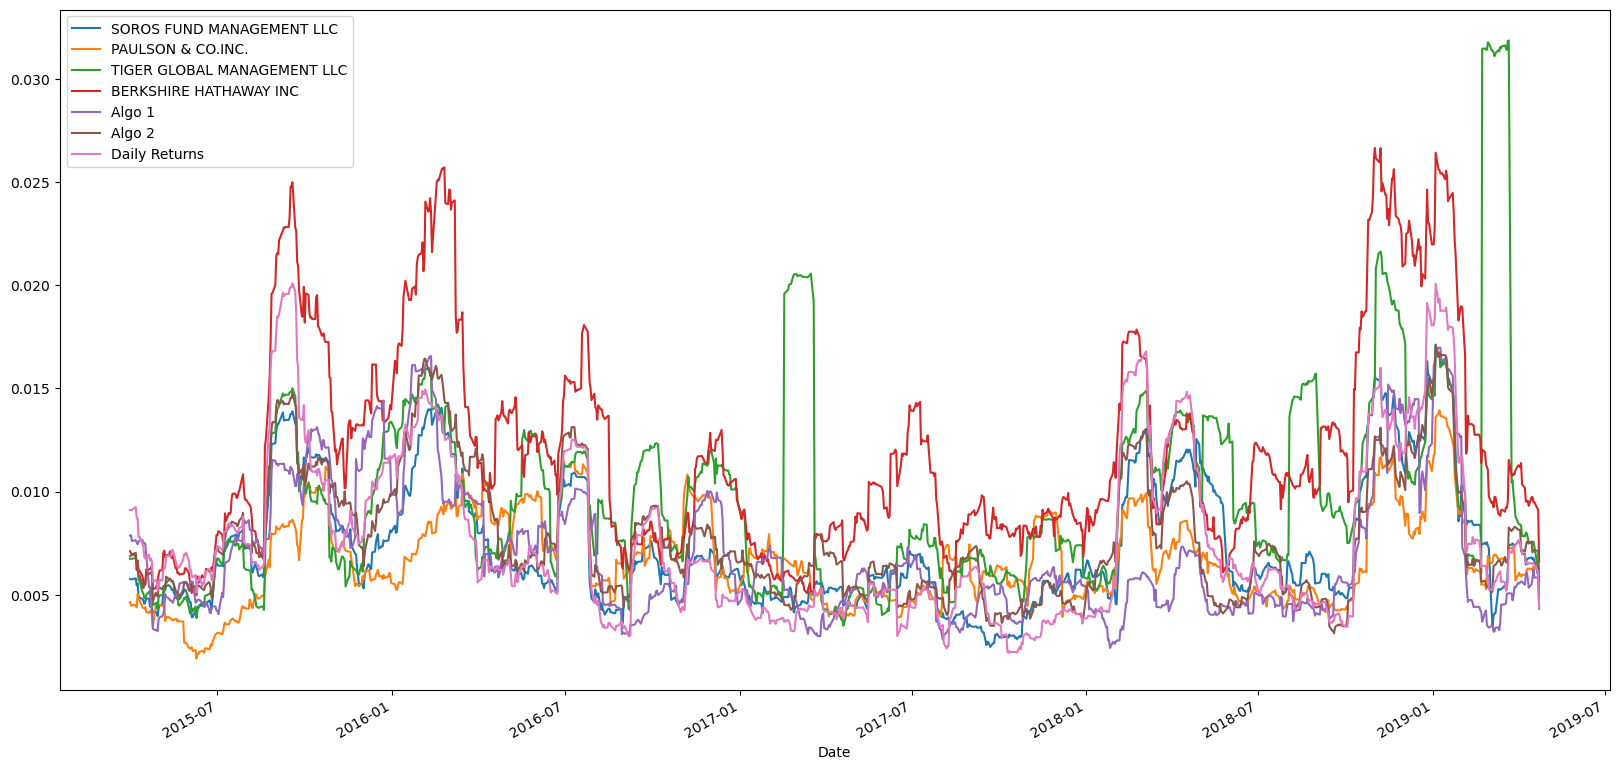

In [318]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combinded_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<Axes: title={'center': 'Correlation Matrix'}>

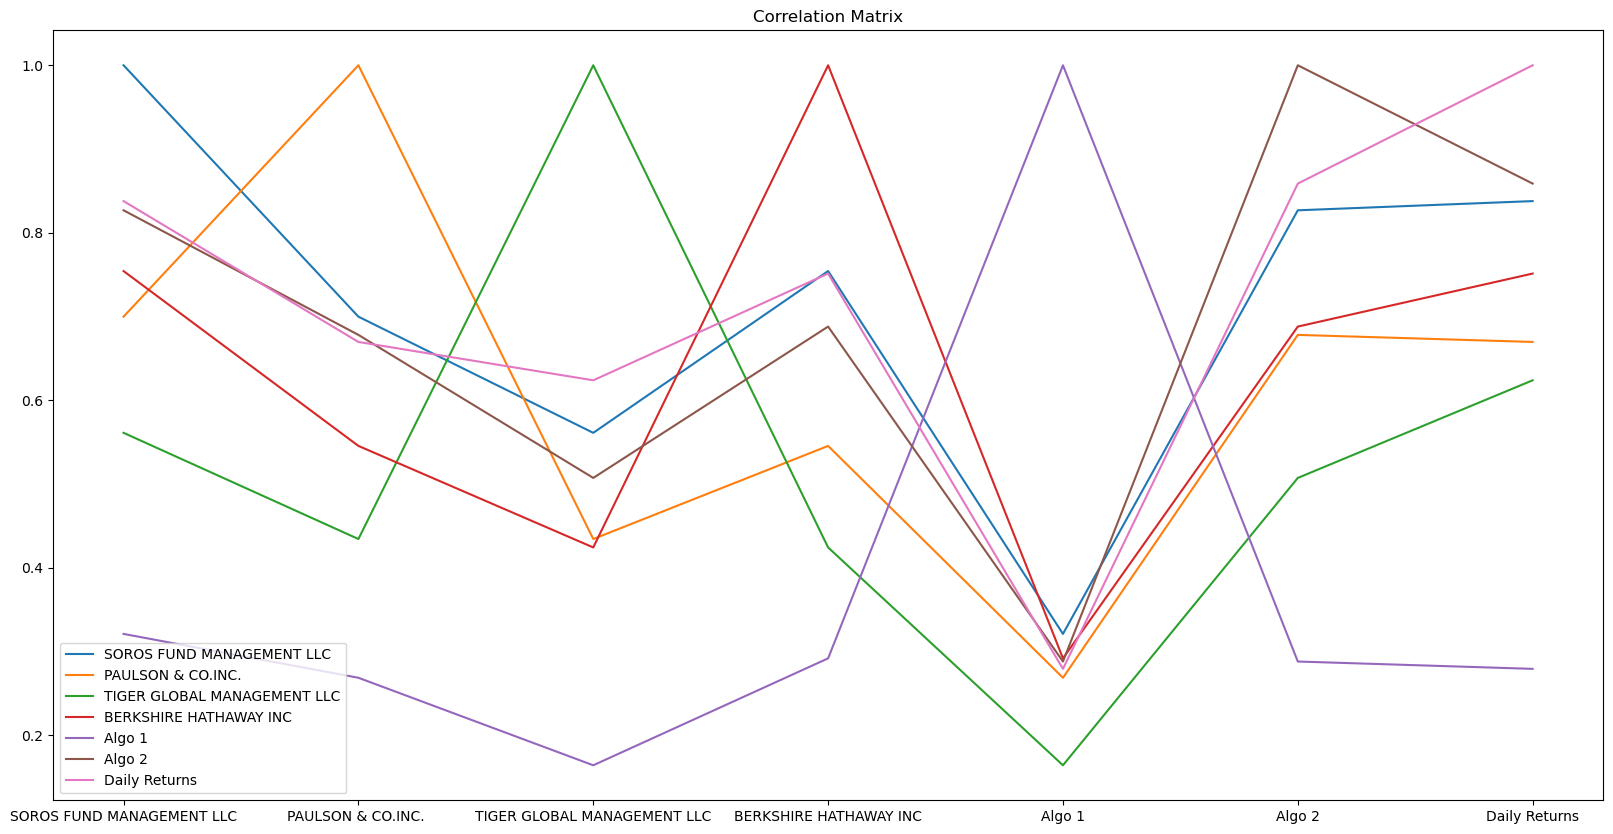

In [319]:
# Calculate the correlation
correlation = combinded_df.corr()
# Display de correlation matrix
correlation.plot(title='Correlation Matrix', figsize=(20,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [320]:
# Calculate covariance of a single portfolio
rolling_covariance = combinded_df['BERKSHIRE HATHAWAY INC'].cov(combinded_df['Daily Returns'])
display(rolling_covariance)
# Calculate variance of S&P 500
sp500_variance = combinded_df['Daily Returns'].var()
display(sp500_variance)
# Computing beta
beta_berkshire = rolling_covariance/sp500_variance
display(beta_berkshire)
# Plot beta trend


8.302834941861666e-05

7.316632424648712e-05

1.1347891297491692

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [321]:
# Use `ewm` to calculate the rolling window
rolling_std_21 = combinded_df.ewm(span=21).std()
rolling_std = rolling_std.dropna()
display(rolling_std)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.009105
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.009095
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.009114
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.009246
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.008707
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [322]:
# Annualized Sharpe Ratios
rfr = combinded_df['Daily Returns'].mean()*np.sqrt(trading_days_per_year)
rx = combinded_df.mean()*np.sqrt(trading_days_per_year)
sharpe_ratios = (rx - rfr)/df_annualized_std
display(sharpe_ratios)

SOROS FUND MANAGEMENT LLC     -0.021790
PAULSON & CO.INC.             -0.080199
TIGER GLOBAL MANAGEMENT LLC   -0.039690
BERKSHIRE HATHAWAY INC         0.012131
Algo 1                         0.041007
Algo 2                        -0.010289
Daily Returns                  0.000000
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

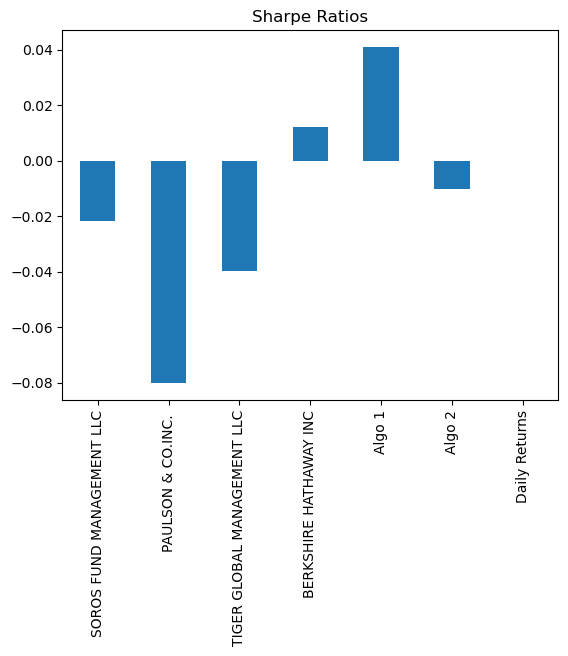

In [323]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
According to my calculations Algo 1 outperforms the market sp500 and the whales portfolios. However, Algo 2 appears to be a failure by all accounts.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [324]:
# Reading data from 1st stock
goog_data = pd.read_csv(Path(r'C:\Users\Micha\Documents\Module 4 Hwk\Starter_Code\Resources\goog_historical.csv'), index_col='Trade DATE',infer_datetime_format=True, parse_dates=True)
goog_data = goog_data.sort_index(axis=0, ascending=True)
goog_data = goog_data.rename(columns={'Symbol': 'Symbol3', 'NOCP' : 'GOOG'})
goog_data

C:\Users\Micha\AppData\Local\Temp\ipykernel_11616\3258755602.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_data = pd.read_csv(Path(r'C:\Users\Micha\Documents\Module 4 Hwk\Starter_Code\Resources\goog_historical.csv'), index_col='Trade DATE',infer_datetime_format=True, parse_dates=True)


,Symbol3,GOOG
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,GOOG,1185.40
2019-05-06,GOOG,1189.39
2019-05-07,GOOG,1174.10


In [325]:
# Reading data from 2nd stock
aapl_data = pd.read_csv(Path(r'C:\Users\Micha\Documents\Module 4 Hwk\Starter_Code\Resources\aapl_historical.csv'), index_col='Trade DATE',infer_datetime_format=True, parse_dates=True)
aapl_data = aapl_data.sort_index(axis=0, ascending=True)
aapl_data = aapl_data.rename(columns={'Symbol': 'Symbol1', 'NOCP' : 'AAPL'})
aapl_data

C:\Users\Micha\AppData\Local\Temp\ipykernel_11616\1744829376.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_data = pd.read_csv(Path(r'C:\Users\Micha\Documents\Module 4 Hwk\Starter_Code\Resources\aapl_historical.csv'), index_col='Trade DATE',infer_datetime_format=True, parse_dates=True)


,Symbol1,AAPL
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,AAPL,211.75
2019-05-06,AAPL,208.48
2019-05-07,AAPL,202.86


In [326]:
# Reading data from 3rd stock
cost_data = pd.read_csv(Path(r'C:\Users\Micha\Documents\Module 4 Hwk\Starter_Code\Resources\cost_historical.csv'), index_col='Trade DATE',infer_datetime_format=True, parse_dates=True)
cost_data = cost_data.sort_index(axis=0, ascending=True)
cost_data = cost_data.rename(columns={'Symbol': 'Symbol2', 'NOCP' : 'COST'})
cost_data

C:\Users\Micha\AppData\Local\Temp\ipykernel_11616\746688663.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_data = pd.read_csv(Path(r'C:\Users\Micha\Documents\Module 4 Hwk\Starter_Code\Resources\cost_historical.csv'), index_col='Trade DATE',infer_datetime_format=True, parse_dates=True)


,Symbol2,COST
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [327]:
# Combine all stocks in a single DataFrame
custome_portfolio = pd.concat([goog_data,cost_data,aapl_data], axis=1)
custome_portfolio

,Symbol3,GOOG,Symbol2,COST,Symbol1,AAPL
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,COST,195.76,AAPL,188.59
2018-05-14,GOOG,1100.20,COST,195.88,AAPL,188.15
2018-05-15,GOOG,1079.23,COST,195.48,AAPL,186.44
2018-05-16,GOOG,1081.77,COST,198.71,AAPL,188.18
2018-05-17,GOOG,1078.59,COST,199.60,AAPL,186.99
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,COST,244.62,AAPL,211.75
2019-05-06,GOOG,1189.39,COST,244.23,AAPL,208.48
2019-05-07,GOOG,1174.10,COST,240.18,AAPL,202.86


In [328]:
# Reset Date index
custome_portfolio.reset_index(inplace=True)
custome_portfolio

,Trade DATE,Symbol3,GOOG,Symbol2,COST,Symbol1,AAPL
0,2018-05-11,GOOG,1098.26,COST,195.76,AAPL,188.59
1,2018-05-14,GOOG,1100.20,COST,195.88,AAPL,188.15
2,2018-05-15,GOOG,1079.23,COST,195.48,AAPL,186.44
3,2018-05-16,GOOG,1081.77,COST,198.71,AAPL,188.18
4,2018-05-17,GOOG,1078.59,COST,199.60,AAPL,186.99
...,...,...,...,...,...,...,...
245,2019-05-03,GOOG,1185.40,COST,244.62,AAPL,211.75
246,2019-05-06,GOOG,1189.39,COST,244.23,AAPL,208.48
247,2019-05-07,GOOG,1174.10,COST,240.18,AAPL,202.86
248,2019-05-08,GOOG,1166.27,COST,241.34,AAPL,202.90


In [329]:
# Reorganize portfolio data by having a column per symbol
custome_portfolio.drop(columns=['Symbol1', 'Symbol2','Symbol3'], inplace=True)
custome_portfolio


,Trade DATE,GOOG,COST,AAPL
0,2018-05-11,1098.26,195.76,188.59
1,2018-05-14,1100.20,195.88,188.15
2,2018-05-15,1079.23,195.48,186.44
3,2018-05-16,1081.77,198.71,188.18
4,2018-05-17,1078.59,199.60,186.99
...,...,...,...,...
245,2019-05-03,1185.40,244.62,211.75
246,2019-05-06,1189.39,244.23,208.48
247,2019-05-07,1174.10,240.18,202.86
248,2019-05-08,1166.27,241.34,202.90


In [330]:
# Calculate daily returns
custome_portfolio_returns = pd.DataFrame()
custome_portfolio_returns['Trade DATE'] = custome_portfolio['Trade DATE']
custome_portfolio_returns['GOOG Returns'] = custome_portfolio['GOOG'].pct_change()
custome_portfolio_returns['COST Returns'] = custome_portfolio['COST'].pct_change()
custome_portfolio_returns['AAPL Returns'] = custome_portfolio['AAPL'].pct_change()

# Drop NAs
custome_portfolio_returns = custome_portfolio_returns.dropna()
# Display sample data
custome_portfolio_returns

,Trade DATE,GOOG Returns,COST Returns,AAPL Returns
1,2018-05-14,0.001766,0.000613,-0.002333
2,2018-05-15,-0.019060,-0.002042,-0.009088
3,2018-05-16,0.002354,0.016523,0.009333
4,2018-05-17,-0.002940,0.004479,-0.006324
5,2018-05-18,-0.011339,-0.003206,-0.003637
...,...,...,...,...
245,2019-05-03,0.019602,0.007953,0.012431
246,2019-05-06,0.003366,-0.001594,-0.015443
247,2019-05-07,-0.012855,-0.016583,-0.026957
248,2019-05-08,-0.006669,0.004830,0.000197


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [331]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return

num_stocks = len(custome_portfolio_returns.columns) - 1  

custome_portfolio_returns['Weighted Returns'] = custome_portfolio_returns.iloc[:, 1:].mean(axis=1) 
# Display sample data
custome_portfolio_returns

,Trade DATE,GOOG Returns,COST Returns,AAPL Returns,Weighted Returns
1,2018-05-14,0.001766,0.000613,-0.002333,0.000015
2,2018-05-15,-0.019060,-0.002042,-0.009088,-0.010064
3,2018-05-16,0.002354,0.016523,0.009333,0.009403
4,2018-05-17,-0.002940,0.004479,-0.006324,-0.001595
5,2018-05-18,-0.011339,-0.003206,-0.003637,-0.006061
...,...,...,...,...,...
245,2019-05-03,0.019602,0.007953,0.012431,0.013329
246,2019-05-06,0.003366,-0.001594,-0.015443,-0.004557
247,2019-05-07,-0.012855,-0.016583,-0.026957,-0.018798
248,2019-05-08,-0.006669,0.004830,0.000197,-0.000547


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [332]:
# Join your returns DataFrame to the original returns DataFrame
custome_portfolio_returns = custome_portfolio_returns.rename(columns={'Trade DATE' : 'Date'})
custome_portfolio_returns.set_index('Date', inplace=True)
final_portfolio = pd.concat([combinded_df,custome_portfolio_returns],axis = 1)


In [333]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_portfolio = final_portfolio.dropna()
final_portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns,GOOG Returns,COST Returns,AAPL Returns,Weighted Returns
Date,,,,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.001766,0.000613,-0.002333,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.019060,-0.002042,-0.009088,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.002354,0.016523,0.009333,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.002940,0.004479,-0.006324,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.011339,-0.003206,-0.003637,-0.006061
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.004938,-0.004019,0.000100,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.007505,0.000897,0.019473,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.000024,0.001018,0.003594,0.001545


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [334]:
# Calculate the annualized `std`
final_portfolio_annualized_std = final_portfolio.std() * np.sqrt(trading_days_per_year)
final_portfolio_annualized_std


SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
Daily Returns                  0.152054
GOOG Returns                   0.255500
COST Returns                   0.212034
AAPL Returns                   0.296951
Weighted Returns               0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns,GOOG Returns,COST Returns,AAPL Returns,Weighted Returns
Date,,,,,,,,,,,
2018-05-15,0.000513,0.000996,0.002255,0.010328,0.001449,0.001961,0.005463,0.014727,0.001877,0.004777,0.007127
2018-05-16,0.005339,0.004181,0.004501,0.010036,0.001625,0.002305,0.005694,0.012223,0.010302,0.009567,0.009963
2018-05-17,0.004958,0.003351,0.005205,0.008053,0.003395,0.002733,0.004539,0.009792,0.008225,0.008244,0.007985
2018-05-18,0.005043,0.003612,0.007120,0.006844,0.003805,0.003304,0.003952,0.008917,0.008036,0.007004,0.007269
2018-05-21,0.004525,0.003284,0.006331,0.008575,0.003401,0.003313,0.005121,0.011321,0.007007,0.007436,0.007588
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.005551,0.005606,0.009747,0.008278,0.005812,0.006588,0.005294,0.008449,0.010429,0.009685,0.006843
2019-04-17,0.005487,0.005727,0.009415,0.007913,0.006320,0.006566,0.005171,0.008195,0.009949,0.010433,0.006827
2019-04-18,0.005232,0.005475,0.008978,0.007546,0.006027,0.006286,0.004932,0.007858,0.009490,0.009951,0.006525


<Axes: xlabel='Date'>

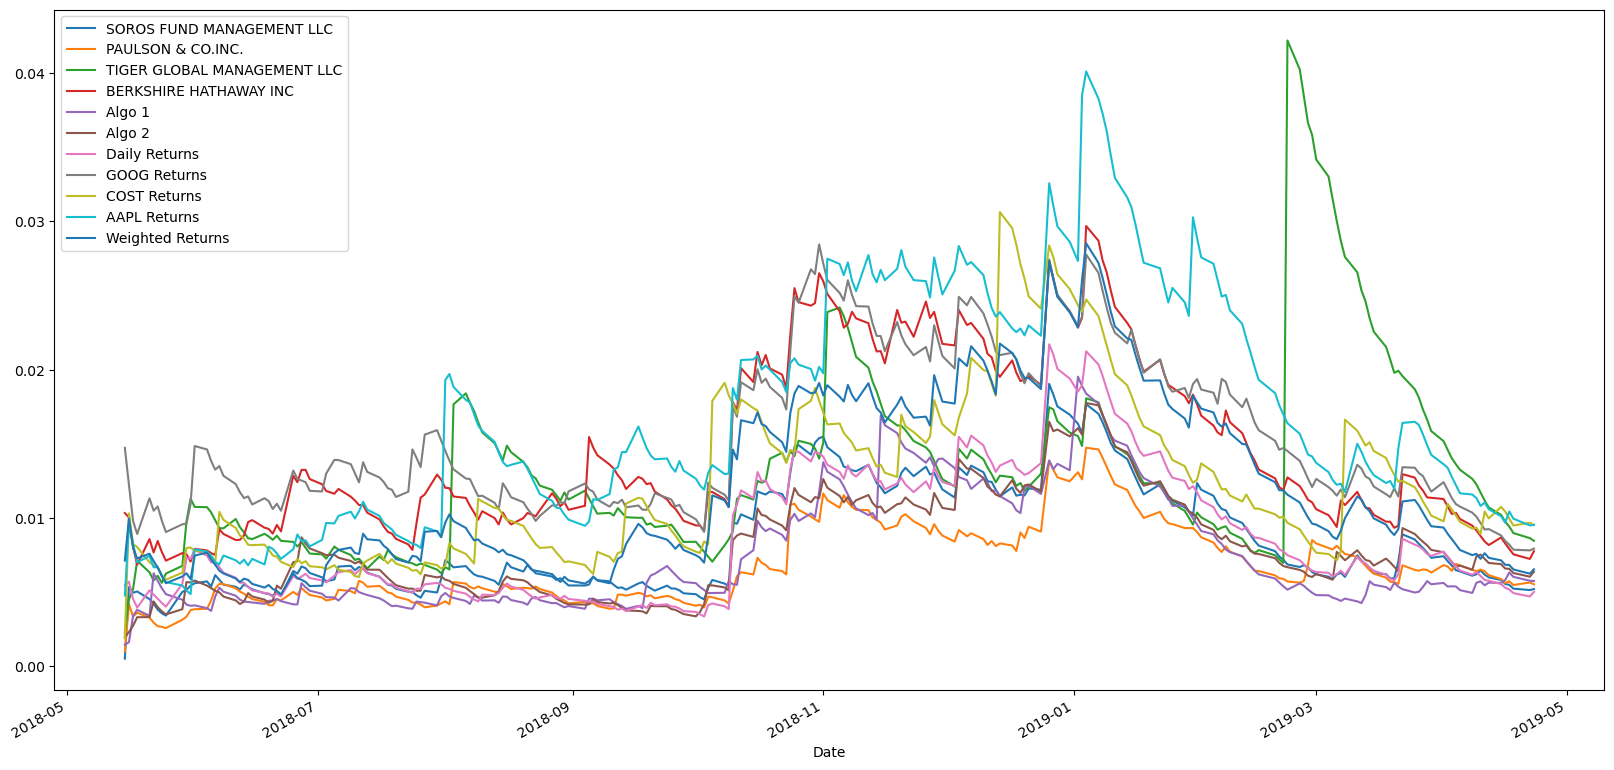

In [335]:
# Calculate rolling standard deviation
final_rolling_21std = final_portfolio.ewm(span=21).std()
final_rolling_21std = final_rolling_21std.dropna()
display(final_rolling_21std)
# Plot rolling standard deviation
final_rolling_21std.plot(figsize=(20,10))

### Calculate and plot the correlation

<Axes: title={'center': 'Final Correlation Matrix'}>

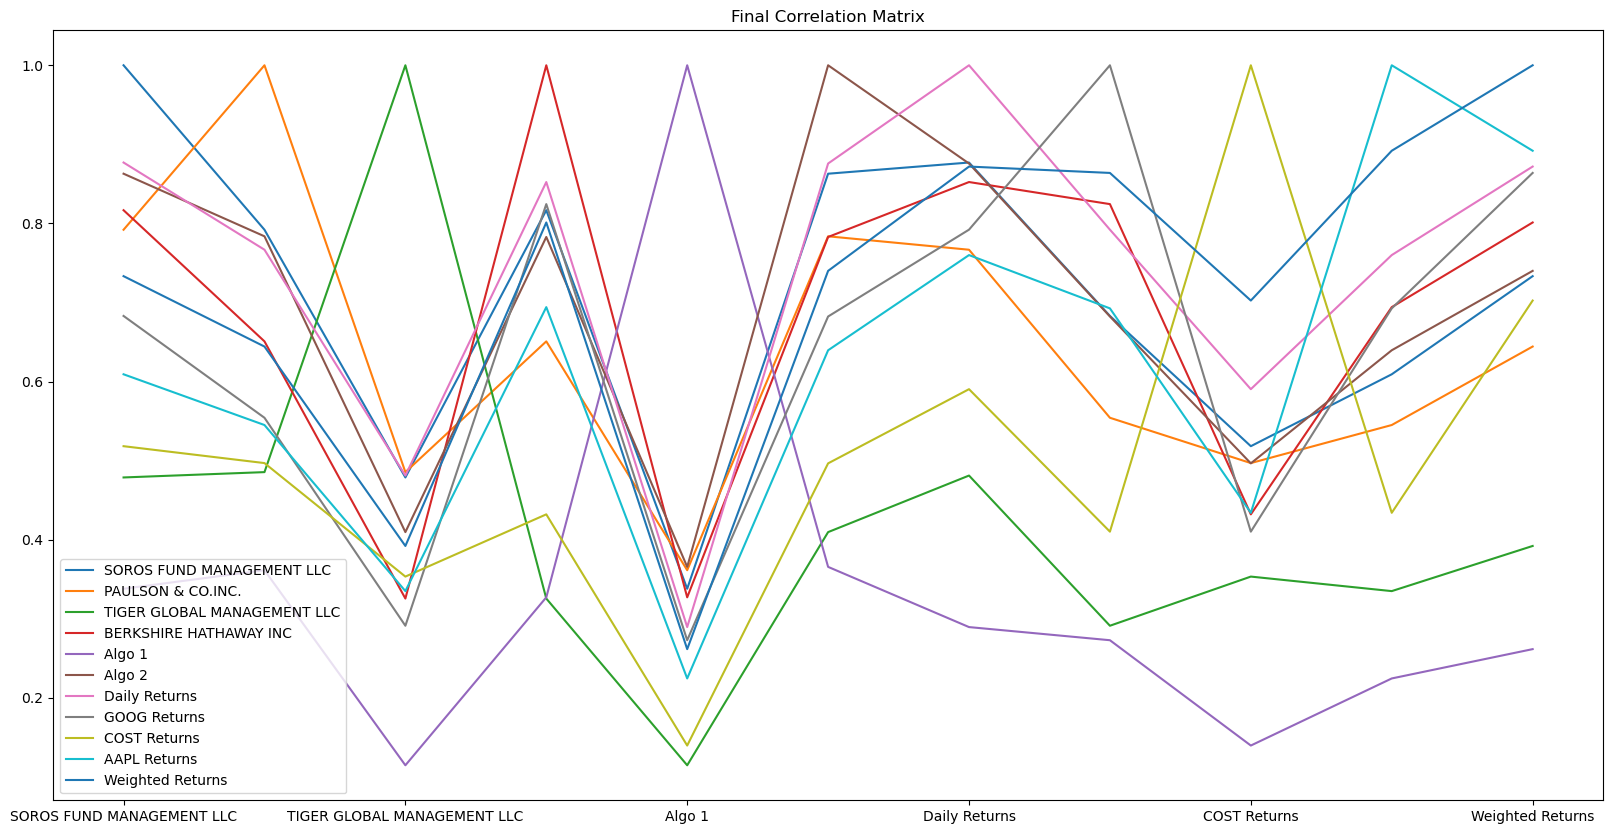

In [336]:
# Calculate and plot the correlation
final_correlation = final_portfolio.corr()
final_correlation.plot(title='Final Correlation Matrix', figsize=(20,10))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Date
2018-08-07    0.997181
2018-08-08    0.997779
2018-08-09    1.010071
2018-08-10    1.034984
2018-08-13    1.044800
                ...   
2019-04-16    0.852098
2019-04-17    0.878632
2019-04-18    0.878309
2019-04-22    0.878780
2019-04-23    0.885580
Length: 178, dtype: float64

<Axes: xlabel='Date'>

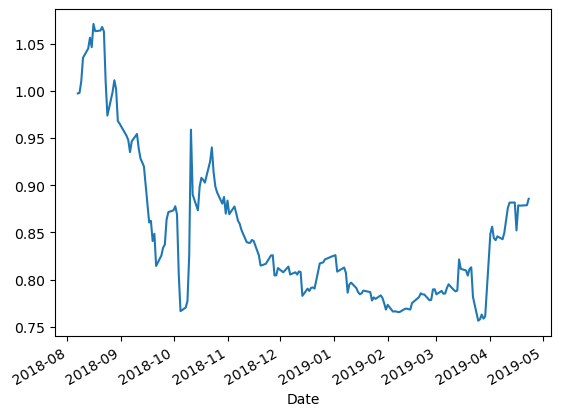

In [337]:
# Calculate and plot Beta
final_covariance = final_portfolio['Weighted Returns'].rolling(window=60).cov(final_portfolio['Daily Returns'])
final_variance = final_portfolio['Daily Returns'].rolling(window=60).var()
final_beta_60 = final_variance/final_covariance
final_beta_60=final_beta_60.dropna()
display(final_beta_60)
final_beta_60.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [338]:
# Calculate Annualized Sharpe Ratios
rfrf = final_portfolio['Daily Returns'].mean()*np.sqrt(trading_days_per_year)
rxf = final_portfolio.mean()*np.sqrt(trading_days_per_year)

sharpe_ratiosf = (rxf - rfrf)/final_portfolio_annualized_std



<Axes: >

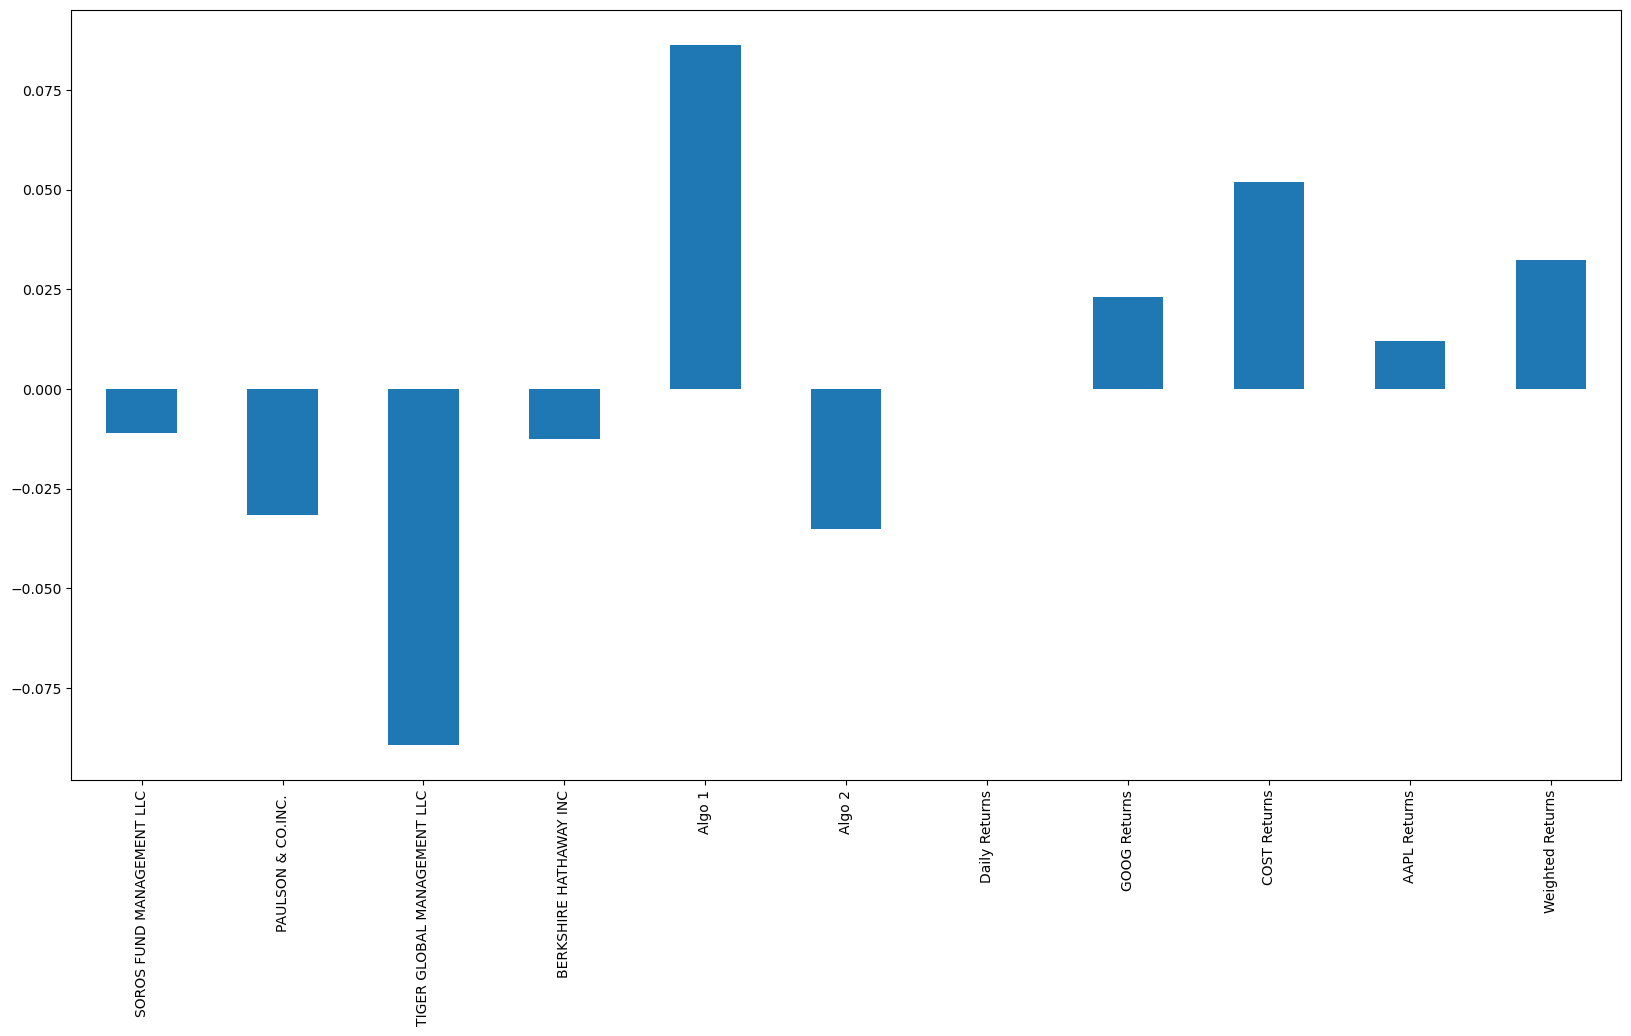

In [339]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratiosf.plot(kind='bar',figsize=(20,10))

### How does your portfolio do?

My Portfolio appears to be doing better than the other portfolios, but still doing worse than algo 1